In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [9]:
df = pd.read_csv("D:\ML\Datasets\Iris.csv")
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.shape

(150, 6)

In [22]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Replace the species names to binary 1, 0 values:

In [16]:
df.Species = df.Species.replace(to_replace=['Iris-setosa', 'Iris-versicolor'], value =[0, 1])
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


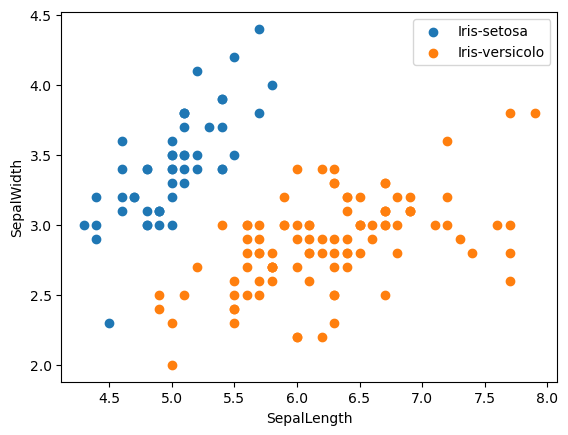

In [19]:
plt.scatter(df[:50].SepalLengthCm,df[:50].SepalWidthCm, label='Iris-setosa') # draws a scatter plot, plotting a single dot for each observation
plt.scatter (df[51:].SepalLengthCm ,df[51:].SepalWidthCm ,label='Iris-versicolo') # draws a scatter plot, plotting a single dot foreach observation
plt.xlabel('SepalLength') # xlabel sets the label for the x-axis
plt.ylabel('SepalWidth') # ylabel sets the label for the y-axis
plt.legend(loc='best') # displays small box containing description of the graph elements at the default (best location for example blue dot denotes Iris - setosa)
plt.show()

In [20]:
X = df.drop(labels=['Id', 'Species'], axis=1).values # the drop() function is utilised to remove rows or columns by specifying labels and corresponding axis . Here the columns Id and Species are being removed.
y = df.Species.values

In order to make random numbers predictable, seeds are set at a value of 23 so the generator creating a random value for the seed value (23) will always be the same random value. This makes the
seed reproducible.

In [23]:
seed = 5
np.random.seed(seed)
tf. ( seed ) # sets the global random seed